# Exercício 2.5.2

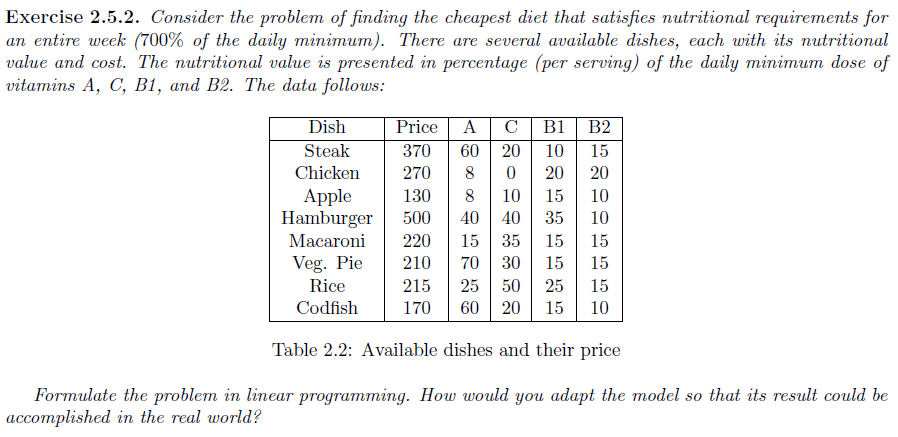

## Modelo

Vamos considerar as variáveis de decisão:
- $D_i$: Número de vezes que comemos o $i$-ésimo prato da lista ao longo da semana

As restates variáveis são indicadas pelas suas iniciais. Temos então o seguinte LP:
$$
\begin{alignat*}{2}

\min_{D_i} &\quad& &\sum_{i}D_iP_i
\\\\

\text{s.t}& &&\sum_{i}D_iA_i \ge 100
\\
&&&\sum_{i}D_iC_i \ge 100
\\

&&&\sum_{i}D_iB1_i \ge 100
\\

&&&\sum_{i}D_iB2_i \ge 100
\\

&&& A, B \ge 0

\end{alignat*}
$$

## Código

In [10]:
from pyscipopt import Model

# Dados da Tabela
data = [
    {"name": "Steak", "Price": 370, "A": 60, "C": 20, "B1": 10, "B2": 15},
    {"name": "Chicken", "Price": 270, "A": 8, "C": 0, "B1": 20, "B2": 20},
    {"name": "Apple", "Price": 130, "A": 8, "C": 10, "B1": 15, "B2": 10},
    {"name": "Hamburger", "Price": 500, "A": 40, "C": 40, "B1": 35, "B2": 10},
    {"name": "Macaroni", "Price": 220, "A": 15, "C": 35, "B1": 15, "B2": 15},
    {"name": "Vegetable Pie", "Price": 210, "A": 70, "C": 30, "B1": 15, "B2": 15},
    {"name": "Rice", "Price": 215, "A": 25, "C": 50, "B1": 25, "B2": 15},
    {"name": "Codfish", "Price": 170, "A": 60, "C": 20, "B1": 15, "B2": 10},
]


# Criar o modelo
m = Model()

# Criar variáveis
vars = []
for item in data:
    vars += [m.addVar(item["name"])]

    # Adicionar a restrição de que não podemos comer a mesma coisa mais do que n vezes por dia!
    m.addCons(vars[-1] <= 2)


# Adicionar restrições (constraints)
for vitamin in ["A", "C", "B1", "B2"]:
    m.addCons(sum(vars[i] * data[i][vitamin] for i in range(len(vars))) >= 100)

# Adicionar objetivo
m.setObjective(sum(vars[i] * data[i]["Price"] for i in range(len(vars))))

# Otimizar o modelo (encontrar a solução ótima)
m.optimize()

# Obtemos todas as variáveis usando m.getVars() e depois, para cada variável i mostramos o seu nome (i.name) e o seu valor (m.getVal(i))
print([(i.name, m.getVal(i)) for i in m.getVars()])

[('Steak', 0.0), ('Chicken', 2.0), ('Apple', 2.0), ('Hamburger', 0.0), ('Macaroni', 0.0), ('Vegetable Pie', 2.0), ('Rice', 0.6666666666666666), ('Codfish', 0.0)]
